In [2]:
import sys
import json
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

sys.path.insert(0, '../codes/')
from bulkmotion_utils import *

In [3]:
font_size = 12
w_cm      = 19       # max width of GRL figure [mm]
l_cm      = 11.5     # not used
cm2in     = 1/2.54   # mm to inches

plt.rcParams.update({'font.size': font_size})

In [4]:
datahome = '/net/kraken/nobak/ykliu/2022-BulkMotion/data'
picdir   = '/net/kraken/nobak/ykliu/2022-BulkMotion/pic'
my_json  = '/net/kraken/nobak/ykliu/2022-BulkMotion/inputs/brief.json'

## Read pre-defined paths
with open(my_json) as file:
    brief = json.load(file)

In [20]:
def symbol_cbar_velo(cmap, vlim=['-10', '10'], orient='horizontal', font_size=10, name='', picdir='.'):
    # Fig 3 velocity map colormap (mm/yr)
    if orient=='vertical':
        fig = plt.figure(figsize=(0.10, .9))
        ax  = fig.add_axes([0.05, 0.05, 0.9, 0.9])
    elif orient=='horizontal':
        fig = plt.figure(figsize=(.9, .10))
        ax  = fig.add_axes([0.05, 0.05, 0.9, 0.9])        
    cbar = mpl.colorbar.ColorbarBase(ax, cmap=plt.get_cmap(cmap), orientation=orient, ticks=[0,1], extend='neither')
    cbar.ax.tick_params(which='both', direction='out', labelsize=font_size)
    #ax.text(0.5,1.5, 'LOS velocity', ha='center')
    if orient=='vertical':
        cbar.ax.set_yticklabels(vlim)    
        cbar.set_label('[mm/yr]', fontsize=font_size, labelpad=-4, rotation=270)
    elif orient=='horizontal':
        cbar.ax.xaxis.set_ticks_position("top")
        cbar.ax.set_xticklabels(vlim)
        cbar.ax.xaxis.set_tick_params(pad=-1)
        cbar.set_label('[mm/yr]', fontsize=font_size, labelpad=-20)
    if picdir:
        fn = f"{picdir}/cbar_velo{name}.pdf"
        plt.savefig(fn, bbox_inches='tight', transparent=True, dpi=800, pad_inches=0.01)
        print('save to file: '+fn)
    plt.show()

    
def symbol_cbar_lat(cmap, vlim=['25', '32'], orient='horizontal', font_size=10, name='', picdir='.'):
    # Fig 3 velocity profile colormap (latitude deg)
    if orient=='vertical':
        fig = plt.figure(figsize=(0.10, .9))
        ax  = fig.add_axes([0.05, 0.05, 0.9, 0.9])
    elif orient=='horizontal':
        fig = plt.figure(figsize=(.9, .10))
        ax  = fig.add_axes([0.05, 0.05, 0.9, 0.9])
    cbar = mpl.colorbar.ColorbarBase(ax, cmap=plt.get_cmap(cmap), orientation=orient, ticks=[0,1], extend='neither')
    cbar.ax.tick_params(which='both', direction='out', labelsize=font_size)
    #ax.text(0.5,1.5, 'Lat', ha='center')
    if orient=='vertical':
        cbar.ax.set_yticklabels(vlim)
        cbar.set_label(r'Lat [$\circ$]', fontsize=font_size, labelpad=-4, rotation=270)
    elif orient=='horizontal':
        cbar.ax.xaxis.set_ticks_position("top")
        cbar.ax.set_xticklabels(vlim)
        cbar.ax.xaxis.set_tick_params(pad=-1)
        cbar.set_label(r'Lat [$\circ$]', fontsize=font_size, labelpad=-20)
    if picdir:    
        fn = f"{picdir}/cbar_lat{name}.pdf"
        plt.savefig(fn, bbox_inches='tight', transparent=True, dpi=800, pad_inches=0.01)
        print('save to file: '+fn)
    plt.show()


def plot_insetprofs(dName, brief, w_cm, picdir='.', **kwargs):
    name, track = dName.split()
    v, range_g, Lats, Lons, demfile, atr = prepare_data_bm(brief[dName])
    
    if 'tick_p1' not in kwargs: kwargs['tick_p1']=None
    if 'tick_p2' not in kwargs: kwargs['tick_p2']=None
    if 'tick_p3' not in kwargs: kwargs['tick_p3']=None
    
    if kwargs['tick_p1']==None:
        if track.startswith('a'):   kwargs['tick_p1']=['in', 'in', 10, -8, True, False, True, False, 'center', 'left']
        elif track.startswith('d'): kwargs['tick_p1']=['in', 'in', 10, -8, False, False, True, False, 'center', 'center']
    if kwargs['tick_p2']==None:
        if track.startswith('a'):   kwargs['tick_p2']=['in', 'in', 10, -8, False, False, True, False, 'center', 'center']
        elif track.startswith('d'): kwargs['tick_p2']=['in', 'in', 10, -8, False, True, True, False, 'center', 'right']
    if kwargs['tick_p3']==None:
        kwargs['tick_p3']=['in', 'in', 10, -8, False, False, False, False, 'center', 'center']    
    
    for key in v:
        v[key] = remove_modes(v[key], N=10)
    v['Corrected velocity'] = v['Velocity2']-v['Plate motion']
    
    lat_min = np.nanmin(Lats)
    lat_max = np.nanmax(Lats)
    print('Latitude: {:.2f} / {:.2f}'.format(lat_min, lat_max))
    symbol_cbar_lat(kwargs['cmap'], vlim=[str(int(lat_min)), str(int(lat_max))], font_size=10, name='_'+track, picdir=picdir)
    kwargs['clim']      = [lat_min, lat_max]
    
    #-------- before
    kwargs['subplot_w']   = w_cm*cm2in
    kwargs['subplot_h']   = w_cm*cm2in * .7
    kwargs['titstr']      = ''
    kwargs['ticks']       = True
    kwargs['tick_params'] = kwargs['tick_p1']
    fn = f"{picdir}/{name}_{track}_rb.png"
    plot_rampprof(data1=v['Velocity2'], data2=None, range_dist=range_g, latitude=Lats, super_title=None, outfile=fn, **kwargs)

    #-------- after
    kwargs['subplot_w']   = w_cm*cm2in
    kwargs['subplot_h']   = w_cm*cm2in * .7    
    kwargs['titstr']      = ''
    kwargs['ticks']       = True
    kwargs['tick_params'] = kwargs['tick_p2']    
    fn = f"{picdir}/{name}_{track}_ra.png"
    plot_rampprof(data1=v['Corrected velocity'], data2=None, range_dist=range_g, latitude=Lats, super_title=None, outfile=fn, **kwargs)

    #-------- PMM
    kwargs['subplot_w']   = w_cm*cm2in * 0.4348
    kwargs['subplot_h']   = w_cm*cm2in * .7
    kwargs['titstr']      = ''
    kwargs['ticks']       = False
    kwargs['tick_params'] = kwargs['tick_p3']    
    fn = f"{picdir}/{name}_{track}_rm.png"
    plot_rampprof(data1=v['Plate motion'], data2=None, range_dist=range_g, latitude=Lats, super_title=None, outfile=fn, **kwargs)        
    

def make_insetmaps(dName, brief, w_cm, l_cm, picdir='.', **kwargs):
    name, track = dName.split()
    v, range_g, Lats, Lons, demfile, atr = prepare_data_bm(brief[dName])
    
    if 'tick_p1' not in kwargs: kwargs['tick_p1']=None
    if 'tick_p2' not in kwargs: kwargs['tick_p2']=None
    if 'tick_p3' not in kwargs: kwargs['tick_p3']=None    
    
    if kwargs['tick_p1']==None:
        if track.startswith('a') or track.startswith('d046'):    kwargs['tick_p1']=['in', -15, -35, True, False, True, False, 'center', 'center']
        elif track.startswith('d') and track.startswith('d119'): kwargs['tick_p1']=['in', -12, -8, False, False, True, False, 'center', 'center']
        else:                                                    kwargs['tick_p1']=['in', -15, -35, False, False, True, False, 'center', 'center']
    if kwargs['tick_p2']==None:
        if track.startswith('a') or track.startswith('d046'):    kwargs['tick_p2']=['in', -15, -35, False, False, True, False, 'center', 'center']
        elif track.startswith('d') and track.startswith('d119'): kwargs['tick_p2']=['in', -15, -35, False, True, True, False, 'right', 'center']
        else:                                                    kwargs['tick_p2']=['in', -15, -35, False, True, True, False, 'center', 'center']
    if kwargs['tick_p3']==None:
        kwargs['tick_p3']=['in', -15, -35, False, False, False, False, 'center', 'center']
    
    vmin, vmax = kwargs['vlims']
    symbol_cbar_velo(kwargs['cmap'], vlim=[str(int(vmin)), str(int(vmax))], font_size=10, name='_'+track, picdir=picdir)
        
        
    #-------- before
    kwargs['tick_params'] = kwargs['tick_p1']
    kwargs['subplot_w'] = w_cm*cm2in
    kwargs['subplot_h'] = l_cm*cm2in
    show_list = ['Velocity2']
    titles    = False
    f_suff    = 'vb'
    v_show    = {ikey: v[ikey] for ikey in show_list}
    fn = f"{picdir}/{name}_{track}_{f_suff}.png"
    plot_imgs(v_show, atr, demfile, titles=titles, super_title=None, outfile=fn, **kwargs)


    #-------- after
    kwargs['tick_params'] = kwargs['tick_p2']
    kwargs['subplot_w'] = w_cm*cm2in
    kwargs['subplot_h'] = l_cm*cm2in    
    show_list = ['Corrected velocity']
    titles    = False
    f_suff    = 'va'
    v_show    = {ikey: v[ikey] for ikey in show_list}
    fn = f"{picdir}/{name}_{track}_{f_suff}.png"
    plot_imgs(v_show, atr, demfile, titles=titles, super_title=None, outfile=fn, **kwargs)


    #-------- PMM
    kwargs['tick_params'] = kwargs['tick_p3']
    kwargs['subplot_w'] = w_cm*cm2in * 0.4348
    kwargs['subplot_h'] = l_cm*cm2in * 0.4348
    show_list = ['Plate motion']
    titles    = False
    f_suff    = 'vm'
    v_show    = {ikey: v[ikey] for ikey in show_list}
    fn = f"{picdir}/{name}_{track}_{f_suff}.png"
    plot_imgs(v_show, atr, demfile, titles=titles, super_title=None, outfile=fn, **kwargs)        

# Ramp profiles, before and after plate motion correction

prepare range distance in geo-coordinates from file: /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_a087_Geo.h5
Range ramp scatter plot shifted by median -2.9802322387695312e-08
Ground range min/max: 0.0 255.40157
Valid (non-nan pixels) ground range min/max: 0.929375 252.75
Ground range distance spans 251.8 km
Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 255.40157
Valid (non-nan pixels) ground range min/max: 0.0 255.40157
Ground range distance spans 255.4 km
Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 255.40157
Valid (non-nan pixels) ground range min/max: 0.929375 252.75
Ground range distance spans 251.8 km
Figure ext:png dpi:400 W/H:2992.13/1196.85
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/Aqaba_a087_rampProf.png


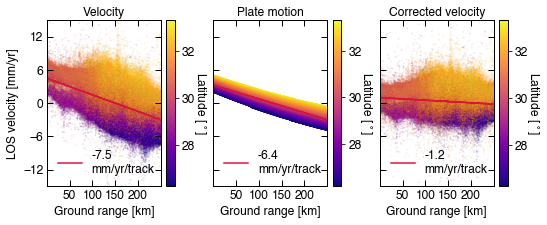

In [11]:
dName = 'Aqaba a087'
name, track = dName.split()
v, range_g, Lats, Lons, demfile, atr = prepare_data_bm(brief[dName])

# Initialize the kwargs
kwargs = dict()
kwargs['subplot_w']   = w_cm*cm2in
kwargs['cmap']        = 'plasma'
kwargs['vlim']        = [-15, 15]
kwargs['titstr']      = ['Velocity','Plate motion','Corrected velocity']
kwargs['title_pad']   = 4.
kwargs['range_type']  = 'Ground'
kwargs['alpha']       = 0.04

fn = f"{picdir}/{name}_{track}_rampProf.png"
plot_range_ramp(data1=v['Velocity2'], data2=v['Plate motion'], range_dist=range_g, latitude=Lats, super_title=None, outfile=fn, **kwargs)


prepare range distance in geo-coordinates from file: /net/kraken/nobak/ykliu/2022-BulkMotion/in_h5/Aqaba_a087_Geo.h5
Plot data no. 1: <Velocity2>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/in_h5/Aqaba_a087_vel.h5 velocity --fontsize 12 -u mm -v -10 10 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/in_h5/Aqaba_a087.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.8 --shade-exag 0.06 --shade-min -3000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.8 --noreference
Plot data no. 2: <Plate motion>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/in_h5/Aqaba_a087_vel.h5 velocity --fontsize 12 -u mm -v -10 10 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/in_h5/Aqaba_a087.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.8 --shade-exag 0.06 --shade-min -3000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.8 --noreference


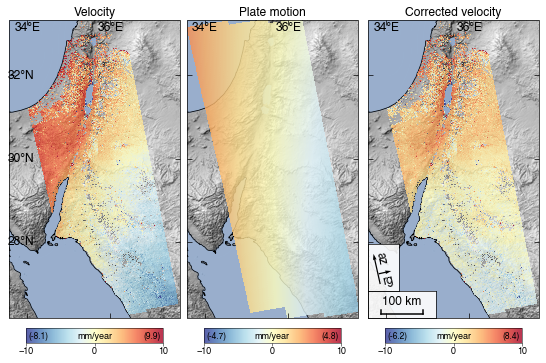

In [175]:
## Plot
dName = 'Aqaba a087'
name, track = dName.split()
v, range_g, Lats, Lons, demfile, atr = prepare_data_bm(brief[dName])


w_cm = 19       # max width of GRL figure
l_cm = 11.5     # not used
cm2in = 1/2.54  # mm to inches

kwargs = dict()
kwargs['subplot_w'] = w_cm*cm2in
kwargs['font_size'] = 12
kwargs['laloStep']  = 2
kwargs['wspace']    = 0.
kwargs['title_pad'] = 4
kwargs['suptity']   = 0.1
kwargs['alpha']     = 0.8
kwargs['shadeExg']  = 0.06
kwargs['shadeMin']  = -3e3
kwargs['shadeMax']  =  5e3
kwargs['refpoint']  = False
kwargs['dpi']       = 600
kwargs['cmap']      = 'RdYlBu_r'
kwargs['vlims']     = [-10,10]

kwargs['corient']       = 'horizontal'
kwargs['cbox_loc']      = (0., 0.-.125, 1, .1)
kwargs['cbox_hide']     = True
kwargs['clabel_pad']    = 0.4

kwargs['sbox_loc']      = (0, 0, .4, .09)
kwargs['scalebar_loc']  = [0.3, kwargs['sbox_loc'][0]+0.2, kwargs['sbox_loc'][1]+.015]
kwargs['scalebar_pad']  = 0.04

kwargs['tbox_loc']  = (0, kwargs['sbox_loc'][3], .18, .16)


v_show = v
fn = f"{picdir}/{name}_{track}_impactBM.png"
titles = ['Velocity', 'Plate motion', 'Corrected velocity']
plot_imgs(v_show, atr, demfile, titles=titles, super_title=None, outfile=fn, **kwargs)

prepare range distance in geo-coordinates from file: /net/kraken/nobak/ykliu/2022-BulkMotion/in_h5/Aqaba_a087_Geo.h5
Plot data no. 1: <Velocity1>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/in_h5/Aqaba_a087_vel.h5 velocity --fontsize 12 -u mm -v -12 12 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/in_h5/Aqaba_a087.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.8 --shade-exag 0.06 --shade-min -3000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.8 --noreference
Plot data no. 2: <VelocityIon>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/in_h5/Aqaba_a087_vel.h5 velocity --fontsize 12 -u mm -v -12 12 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/in_h5/Aqaba_a087.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.8 --shade-exag 0.06 --shade-min -3000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.8 --noreference
P

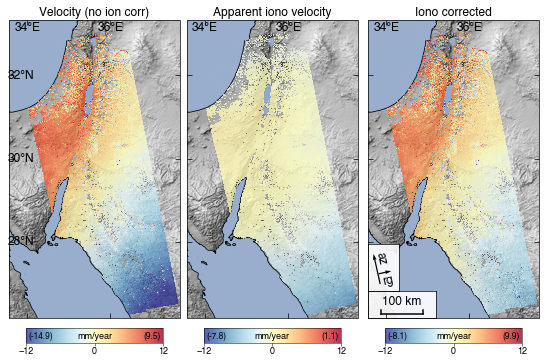

In [179]:
## Plot
dName = 'Aqaba a087'
name, track = dName.split()
v, range_g, Lats, Lons, demfile, atr = prepare_data_ion(brief[dName])

kwargs['vlims']     = [-12,12]

v_show = v
fn = f"{picdir}/{name}_{track}_impactION.png"
titles = ['Velocity (no ion corr)', 'Apparent iono velocity', 'Iono corrected']
plot_imgs(v_show, atr, demfile, titles=titles, super_title=None, outfile=fn, **kwargs)

prepare range distance in geo-coordinates from file: /net/kraken/nobak/ykliu/2022-BulkMotion/in_h5/Aqaba_d021_Geo.h5
Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 257.00183
Valid (non-nan pixels) ground range min/max: 1.7585938 254.00235
Ground range distance spans 252.2 km
Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 257.00183
Valid (non-nan pixels) ground range min/max: 0.0 257.00183
Ground range distance spans 257.0 km
Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 257.00183
Valid (non-nan pixels) ground range min/max: 1.7585938 254.00235
Ground range distance spans 252.2 km
Figure ext:png dpi:400 W/H:2992.125984251968/1196.8503937007872
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/Aqaba_d021_rampProf.png


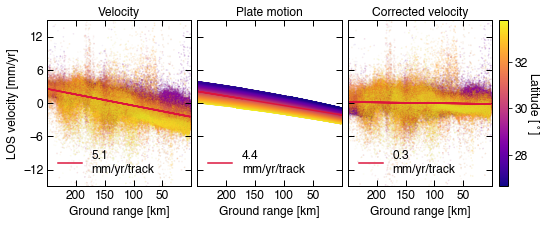

In [246]:
dName = 'Aqaba d021'
name, track = dName.split()
v, range_g, Lats, Lons, demfile, atr = prepare_data_bm(brief[dName])

# Initialize the kwargs
kwargs = dict()
kwargs['subplot_w']   = w_cm*cm2in
kwargs['cmap']        = 'plasma'
kwargs['vlim']        = [-15, 15]
kwargs['titstr']      = ['Velocity','Plate motion','Corrected velocity']
kwargs['title_pad']   = 4.
kwargs['range_type']  = 'Ground'
kwargs['alpha']       = 0.04

fn = f"{picdir}/{name}_{track}_rampProf.png"
plot_range_ramp(data1=v['Velocity2'], data2=v['Plate motion'], range_dist=range_g, latitude=Lats, super_title=None, outfile=fn, **kwargs)


prepare range distance in geo-coordinates from file: /net/kraken/nobak/ykliu/2022-BulkMotion/in_h5/Aqaba_d021_Geo.h5
Plot data no. 1: <Velocity2>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/in_h5/Aqaba_d021_vel.h5 velocity --fontsize 12 -u mm -v -10 10 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/in_h5/Aqaba_d021.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.8 --shade-exag 0.06 --shade-min -3000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.8 --noreference
Plot data no. 2: <Plate motion>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/in_h5/Aqaba_d021_vel.h5 velocity --fontsize 12 -u mm -v -10 10 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/in_h5/Aqaba_d021.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.8 --shade-exag 0.06 --shade-min -3000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.8 --noreference


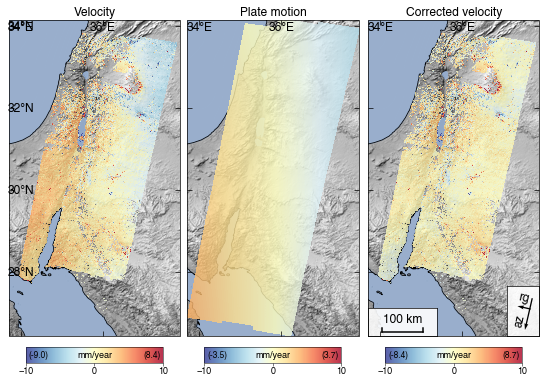

In [184]:
## Plot
dName = 'Aqaba d021'
name, track = dName.split()
v, range_g, Lats, Lons, demfile, atr = prepare_data_bm(brief[dName])

kwargs['vlims']     = [-10,10]

kwargs['sbox_loc']      = (0, 0, .4, .09)
kwargs['scalebar_loc']  = [0.3, kwargs['sbox_loc'][0]+0.2, kwargs['sbox_loc'][1]+.015]
kwargs['scalebar_pad']  = 0.04
kwargs['tbox_loc']      = (1-.19, 0, .19, .16)


v_show = v
fn = f"{picdir}/{name}_{track}_impactBM.png"
titles = ['Velocity', 'Plate motion', 'Corrected velocity']
plot_imgs(v_show, atr, demfile, titles=titles, super_title=None, outfile=fn, **kwargs)

prepare range distance in geo-coordinates from file: /net/kraken/nobak/ykliu/2022-BulkMotion/in_h5/Aqaba_d021_Geo.h5
Plot data no. 1: <Velocity1>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/in_h5/Aqaba_d021_vel.h5 velocity --fontsize 12 -u mm -v -6 6 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/in_h5/Aqaba_d021.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.8 --shade-exag 0.06 --shade-min -3000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.8 --noreference
Plot data no. 2: <VelocityIon>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/in_h5/Aqaba_d021_vel.h5 velocity --fontsize 12 -u mm -v -6 6 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/in_h5/Aqaba_d021.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.8 --shade-exag 0.06 --shade-min -3000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.8 --noreference
Plot 

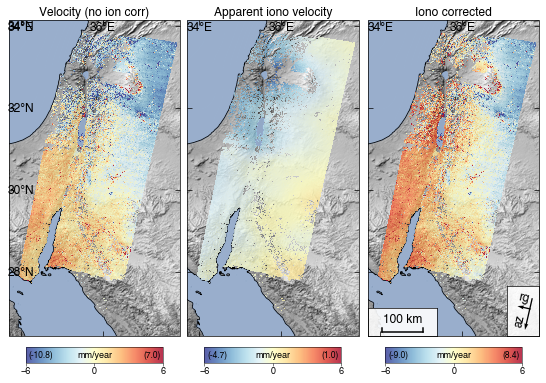

In [183]:
## Plot
dName = 'Aqaba d021'
name, track = dName.split()
v, range_g, Lats, Lons, demfile, atr = prepare_data_ion(brief[dName])

kwargs['vlims']     = [-6,6]

v_show = v
fn = f"{picdir}/{name}_{track}_impactION.png"
titles = ['Velocity (no ion corr)', 'Apparent iono velocity', 'Iono corrected']
plot_imgs(v_show, atr, demfile, titles=titles, super_title=None, outfile=fn, **kwargs)

prepare range distance in geo-coordinates from file: /net/kraken/nobak/ykliu/2022-BulkMotion/in_h5/Makran_a086_Geo.h5
Set weird modes to NaN: Velocity2
  Count: 1057 	 value: -1.2592207193374634
  Count: 252 	 value: -7.814444541931152


<ipython-input-428-a3a814cb7d4a>:477: RuntimeWarning: Mean of empty slice
  tmp = np.nanmean(xarry, axis=0)


Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 257.52603
Valid (non-nan pixels) ground range min/max: 0.7483125 257.50296
Ground range distance spans 256.8 km
Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 257.52603
Valid (non-nan pixels) ground range min/max: 0.0 257.52603
Ground range distance spans 257.5 km
Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 257.52603
Valid (non-nan pixels) ground range min/max: 0.7483125 257.50296
Ground range distance spans 256.8 km
Figure ext:png dpi:400 W/H:2992.125984251968/1196.8503937007872
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/Makran_a086_rampProf.png


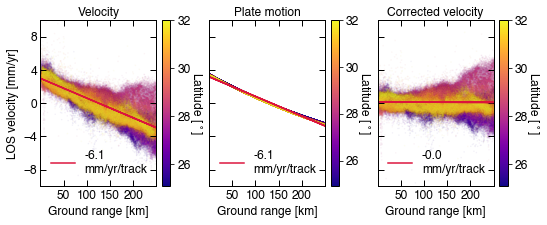

In [431]:
dName = 'Makran a086'
name, track = dName.split()
v, range_g, Lats, Lons, demfile, atr = prepare_data_bm(brief[dName])

for key in v:
    v[key] = remove_modes(v[key])

# Initialize the kwargs
w_cm = 19
kwargs = dict()
kwargs['subplot_w']   = w_cm*cm2in
kwargs['cmap']        = 'plasma'
kwargs['vlim']        = [-10,10]
kwargs['titstr']      = ['Velocity','Plate motion','Corrected velocity']
kwargs['title_pad']   = 4.
kwargs['range_type']  = 'Ground'
kwargs['alpha']       = 0.04

fn = f"{picdir}/{name}_{track}_rampProf.png"
plot_range_ramp(data1=v['Velocity2'], data2=v['Plate motion'], range_dist=range_g, latitude=Lats, super_title=None, outfile=fn, **kwargs)


prepare range distance in geo-coordinates from file: /net/kraken/nobak/ykliu/2022-BulkMotion/in_h5/Makran_d020_Geo.h5
Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 257.334
Valid (non-nan pixels) ground range min/max: 0.17575 256.69208
Ground range distance spans 256.5 km
Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 257.334
Valid (non-nan pixels) ground range min/max: 0.0 257.334
Ground range distance spans 257.3 km
Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 257.334
Valid (non-nan pixels) ground range min/max: 0.17575 256.69208
Ground range distance spans 256.5 km
Figure ext:png dpi:400 W/H:2992.125984251968/1196.8503937007872
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/Makran_d020_rampProf.png


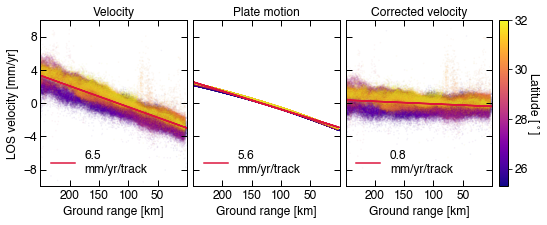

In [248]:
dName = 'Makran d020'
name, track = dName.split()
v, range_g, Lats, Lons, demfile, atr = prepare_data_bm(brief[dName])

for key in v:
    v[key] = remove_modes(v[key])

# Initialize the kwargs
kwargs = dict()
kwargs['subplot_w']   = w_cm*cm2in
kwargs['cmap']        = 'plasma'
kwargs['vlim']        = [-10,10]
kwargs['titstr']      = ['Velocity','Plate motion','Corrected velocity']
kwargs['title_pad']   = 4.
kwargs['range_type']  = 'Ground'
kwargs['alpha']       = 0.04

fn = f"{picdir}/{name}_{track}_rampProf.png"
plot_range_ramp(data1=v['Velocity2'], data2=v['Plate motion'], range_dist=range_g, latitude=Lats, super_title=None, outfile=fn, **kwargs)


prepare range distance in geo-coordinates from file: /net/kraken/nobak/ykliu/2022-BulkMotion/in_h5/Makran_a013_Geo.h5


<ipython-input-244-77532a113577>:471: RuntimeWarning: Mean of empty slice
  tmp = np.nanmean(range_dist, axis=0)


Range ramp scatter plot shifted by median 1.862645149230957e-09
Ground range min/max: 0.0 256.42004
Valid (non-nan pixels) ground range min/max: 0.306 256.42004
Ground range distance spans 256.1 km
Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 256.42004
Valid (non-nan pixels) ground range min/max: 0.0 256.42004
Ground range distance spans 256.4 km
Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 256.42004
Valid (non-nan pixels) ground range min/max: 0.306 256.42004
Ground range distance spans 256.1 km
Figure ext:png dpi:400 W/H:2992.125984251968/1196.8503937007872
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/Makran_a013_rampProf.png


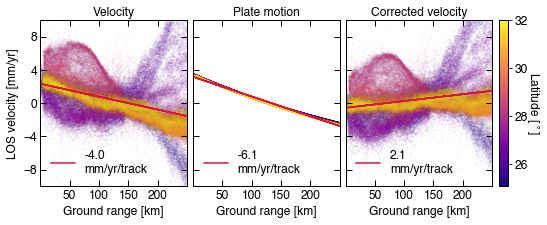

In [249]:
dName = 'Makran a013'
name, track = dName.split()
v, range_g, Lats, Lons, demfile, atr = prepare_data_bm(brief[dName])

for key in v:
    v[key] = remove_modes(v[key])

# Initialize the kwargs
kwargs = dict()
kwargs['subplot_w']   = w_cm*cm2in
kwargs['cmap']        = 'plasma'
kwargs['vlim']        = [-10,10]
kwargs['titstr']      = ['Velocity','Plate motion','Corrected velocity']
kwargs['title_pad']   = 4.
kwargs['range_type']  = 'Ground'
kwargs['alpha']       = 0.04

fn = f"{picdir}/{name}_{track}_rampProf.png"
plot_range_ramp(data1=v['Velocity2'], data2=v['Plate motion'], range_dist=range_g, latitude=Lats, super_title=None, outfile=fn, **kwargs)


prepare range distance in geo-coordinates from file: /net/kraken/nobak/ykliu/2022-BulkMotion/in_h5/Makran_a159_Geo.h5


<ipython-input-244-77532a113577>:471: RuntimeWarning: Mean of empty slice
  tmp = np.nanmean(range_dist, axis=0)


Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 257.86792
Valid (non-nan pixels) ground range min/max: 0.624875 257.28802
Ground range distance spans 256.7 km
Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 257.86792
Valid (non-nan pixels) ground range min/max: 0.0 257.86792
Ground range distance spans 257.9 km
Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 257.86792
Valid (non-nan pixels) ground range min/max: 0.624875 257.28802
Ground range distance spans 256.7 km
Figure ext:png dpi:400 W/H:2992.125984251968/1196.8503937007872
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/Makran_a159_rampProf.png


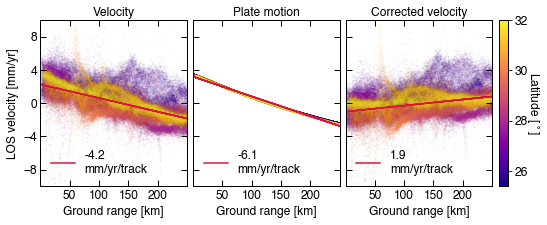

In [250]:
dName = 'Makran a159'
name, track = dName.split()
v, range_g, Lats, Lons, demfile, atr = prepare_data_bm(brief[dName])

for key in v:
    v[key] = remove_modes(v[key])

# Initialize the kwargs
kwargs = dict()
kwargs['subplot_w']   = w_cm*cm2in
kwargs['cmap']        = 'plasma'
kwargs['vlim']        = [-10,10]
kwargs['titstr']      = ['Velocity','Plate motion','Corrected velocity']
kwargs['title_pad']   = 4.
kwargs['range_type']  = 'Ground'
kwargs['alpha']       = 0.04

fn = f"{picdir}/{name}_{track}_rampProf.png"
plot_range_ramp(data1=v['Velocity2'], data2=v['Plate motion'], range_dist=range_g, latitude=Lats, super_title=None, outfile=fn, **kwargs)


prepare range distance in geo-coordinates from file: /net/kraken/nobak/ykliu/2022-BulkMotion/in_h5/Makran_a115_Geo.h5
Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 255.4626
Valid (non-nan pixels) ground range min/max: 0.0455 253.6009
Ground range distance spans 253.6 km
Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 255.4626
Valid (non-nan pixels) ground range min/max: 0.0 255.4626
Ground range distance spans 255.5 km
Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 255.4626
Valid (non-nan pixels) ground range min/max: 0.0455 253.6009
Ground range distance spans 253.6 km
Figure ext:png dpi:400 W/H:2992.125984251968/1196.8503937007872
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/Makran_a115_rampProf.png


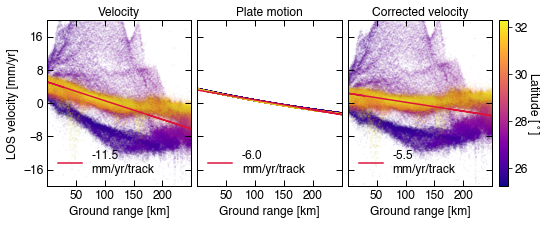

In [253]:
dName = 'Makran a115'
name, track = dName.split()
v, range_g, Lats, Lons, demfile, atr = prepare_data_bm(brief[dName])

for key in v:
    v[key] = remove_modes(v[key])

# Initialize the kwargs
kwargs = dict()
kwargs['subplot_w']   = w_cm*cm2in
kwargs['cmap']        = 'plasma'
kwargs['vlim']        = [-20,20]
kwargs['titstr']      = ['Velocity','Plate motion','Corrected velocity']
kwargs['title_pad']   = 4.
kwargs['range_type']  = 'Ground'
kwargs['alpha']       = 0.04

fn = f"{picdir}/{name}_{track}_rampProf.png"
plot_range_ramp(data1=v['Velocity2'], data2=v['Plate motion'], range_dist=range_g, latitude=Lats, super_title=None, outfile=fn, **kwargs)


prepare range distance in geo-coordinates from file: /net/kraken/nobak/ykliu/2022-BulkMotion/in_h5/Australia_d046_Geo.h5
Range ramp scatter plot shifted by median 1.4901161193847656e-08
Ground range min/max: 0.0 253.3031
Valid (non-nan pixels) ground range min/max: 0.1443125 251.93903
Ground range distance spans 251.8 km
Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 253.3031
Valid (non-nan pixels) ground range min/max: 0.0 253.3031
Ground range distance spans 253.3 km
Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 253.3031
Valid (non-nan pixels) ground range min/max: 0.1443125 251.93903
Ground range distance spans 251.8 km
Figure ext:png dpi:400 W/H:2992.125984251968/1196.8503937007872
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/Australia_d046_rampProf.png


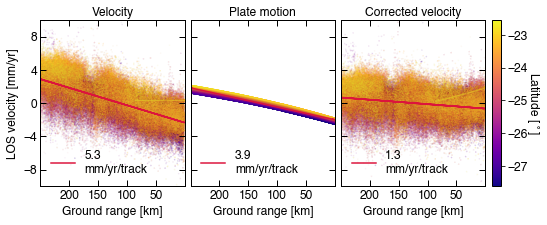

In [254]:
dName = 'Australia d046'
name, track = dName.split()
v, range_g, Lats, Lons, demfile, atr = prepare_data_bm(brief[dName])

# Initialize the kwargs
kwargs = dict()
kwargs['subplot_w']   = w_cm*cm2in
kwargs['cmap']        = 'plasma'
kwargs['vlim']        = [-10,10]
kwargs['titstr']      = ['Velocity','Plate motion','Corrected velocity']
kwargs['title_pad']   = 4.
kwargs['range_type']  = 'Ground'
kwargs['alpha']       = 0.04

fn = f"{picdir}/{name}_{track}_rampProf.png"
plot_range_ramp(data1=v['Velocity2'], data2=v['Plate motion'], range_dist=range_g, latitude=Lats, super_title=None, outfile=fn, **kwargs)


prepare range distance in geo-coordinates from file: /net/kraken/nobak/ykliu/2022-BulkMotion/in_h5/Australia_d119_Geo.h5
Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 253.31784
Valid (non-nan pixels) ground range min/max: 0.9756875 251.99696
Ground range distance spans 251.0 km
Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 253.31784
Valid (non-nan pixels) ground range min/max: 0.0 253.31784
Ground range distance spans 253.3 km
Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 253.31784
Valid (non-nan pixels) ground range min/max: 0.9756875 251.99696
Ground range distance spans 251.0 km
Figure ext:png dpi:400 W/H:2992.125984251968/1196.8503937007872
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/Australia_d119_rampProf.png


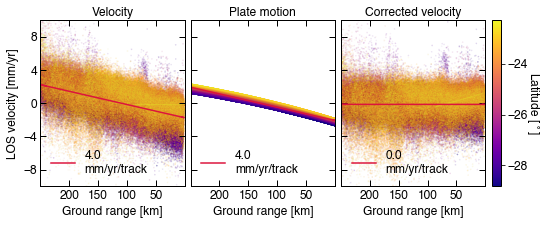

In [255]:
dName = 'Australia d119'
name, track = dName.split()
v, range_g, Lats, Lons, demfile, atr = prepare_data_bm(brief[dName])

# Initialize the kwargs
kwargs = dict()
kwargs['subplot_w']   = w_cm*cm2in
kwargs['cmap']        = 'plasma'
kwargs['vlim']        = [-10,10]
kwargs['titstr']      = ['Velocity','Plate motion','Corrected velocity']
kwargs['title_pad']   = 4.
kwargs['range_type']  = 'Ground'
kwargs['alpha']       = 0.04

fn = f"{picdir}/{name}_{track}_rampProf.png"
plot_range_ramp(data1=v['Velocity2'], data2=v['Plate motion'], range_dist=range_g, latitude=Lats, super_title=None, outfile=fn, **kwargs)


prepare range distance in geo-coordinates from file: /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_d020_Geo.h5
Plot data no. 1: <Velocity2>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_d020_vel.h5 velocity --fontsize 12 -u mm -v -10 10 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_d020.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.8 --shade-exag 0.06 --shade-min -3000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.8 --noreference
Plot data no. 2: <Plate motion>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_d020_vel.h5 velocity --fontsize 12 -u mm -v -10 10 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_d020.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.8 --shade-exag 0.06 --shade-min -3000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.8 --noreference


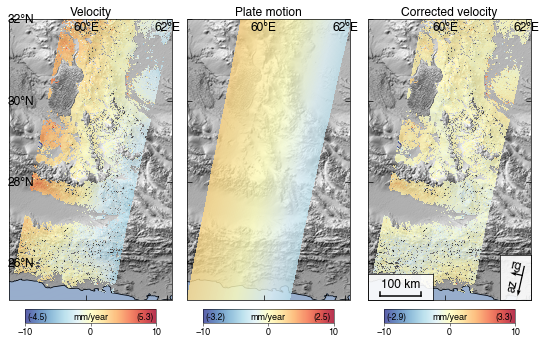

In [12]:
## Plot

dName = 'Makran d020'
name, track = dName.split()
v, range_g, Lats, Lons, demfile, atr = prepare_data_bm(brief[dName])


w_cm = 19      # max width of GRL figure
cm2in = 1/2.54  # mm to inches

kwargs = dict()
kwargs['subplot_w'] = w_cm*cm2in
kwargs['font_size'] = 12
kwargs['laloStep']  = 2
kwargs['wspace']    = 0.
kwargs['title_pad'] = 4
kwargs['suptity']   = 0.1
kwargs['alpha']     = 0.8
kwargs['shadeExg']  = 0.06
kwargs['shadeMin']  = -3e3
kwargs['shadeMax']  =  5e3
kwargs['refpoint']  = False
kwargs['dpi']       = 600
kwargs['cmap']      = 'RdYlBu_r'
kwargs['vlims']     = [-10,10]

kwargs['corient']       = 'horizontal'
kwargs['cbox_loc']      = (0., 0.-.125, 1, .1)
kwargs['cbox_hide']     = True
kwargs['clabel_pad']    = 0.4

kwargs['sbox_loc']      = (0, 0, .4, .09)
kwargs['scalebar_loc']  = [0.3, kwargs['sbox_loc'][0]+0.2, kwargs['sbox_loc'][1]+.015]
kwargs['scalebar_pad']  = 0.04
kwargs['tbox_loc']      = (1-.19, 0, .19, .16)


show_list = ['Velocity2']
v_show    = v # {ikey: v[ikey] for ikey in show_list}
fn = f"{picdir}/{name}_{track}_impactBM.png"
titles = ['Velocity', 'Plate motion', 'Corrected velocity']
plot_imgs(v_show, atr, demfile, titles=titles, super_title=None, outfile=fn, **kwargs)